<a href="https://colab.research.google.com/github/Aditya2600/Porter-Case-Study/blob/main/The_Porter_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [3]:
!gdown 1WFa46c7_uSZ6GSzgYrDk4TKJd3y9zv8f

Downloading...
From: https://drive.google.com/uc?id=1WFa46c7_uSZ6GSzgYrDk4TKJd3y9zv8f
To: /content/data_2.csv
100% 15.7M/15.7M [00:00<00:00, 142MB/s]


In [4]:
df = pd.read_csv('data_2.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [7]:
df['time_taken'] = df['actual_delivery_time'] - df['created_at']
df['time_taken_mins'] = pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0


In [8]:
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0,2,1


In [9]:
df.drop(['time_taken', 'created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

In [10]:
df.isna().sum()

,0
market_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_dashers,0
total_busy_dashers,0


<Axes: >

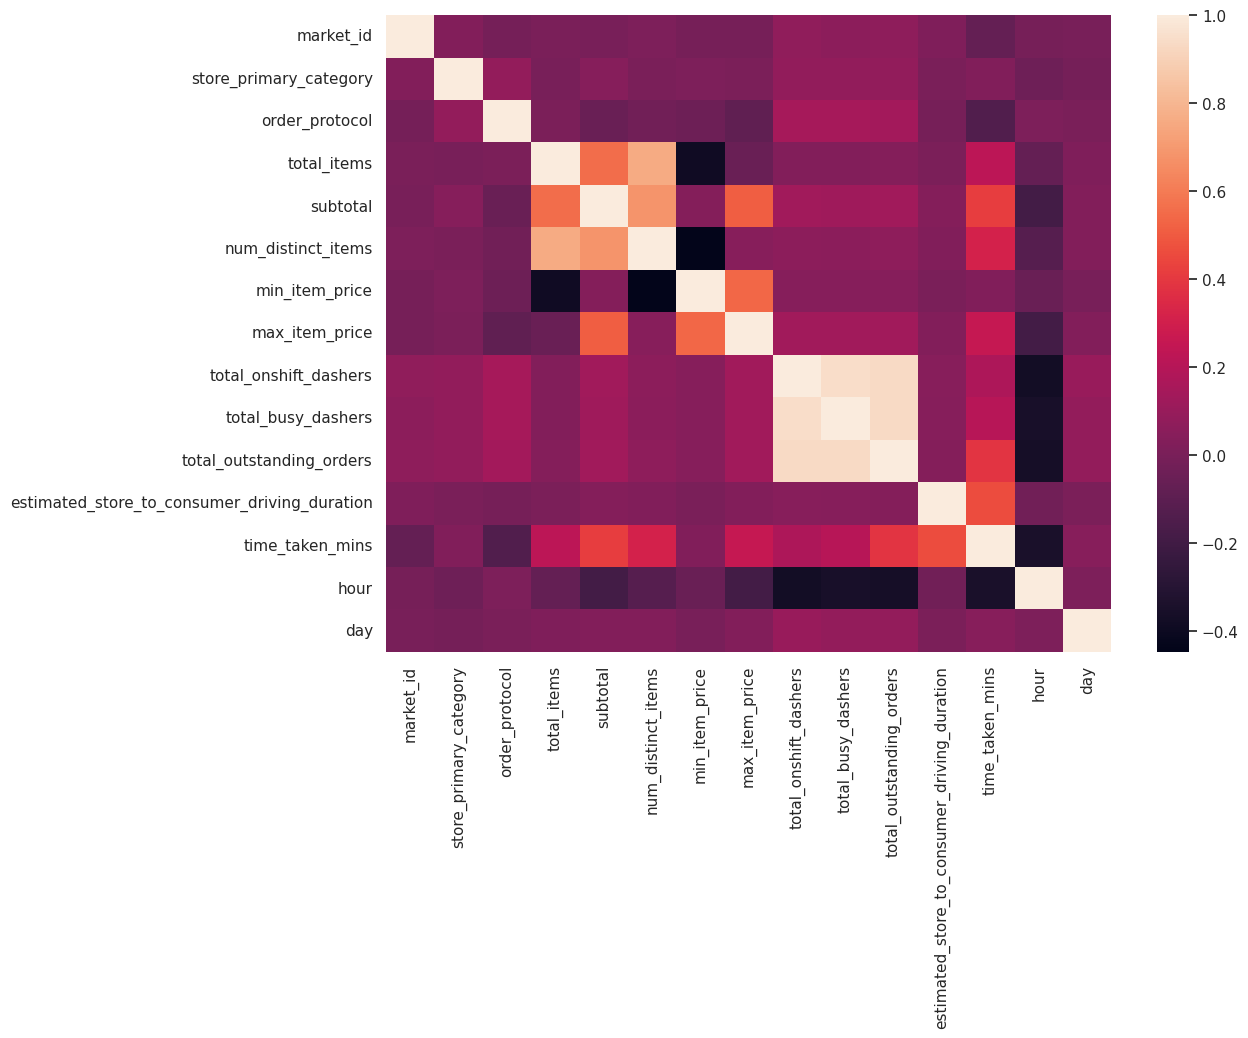

In [11]:
sns.heatmap(df.corr())

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

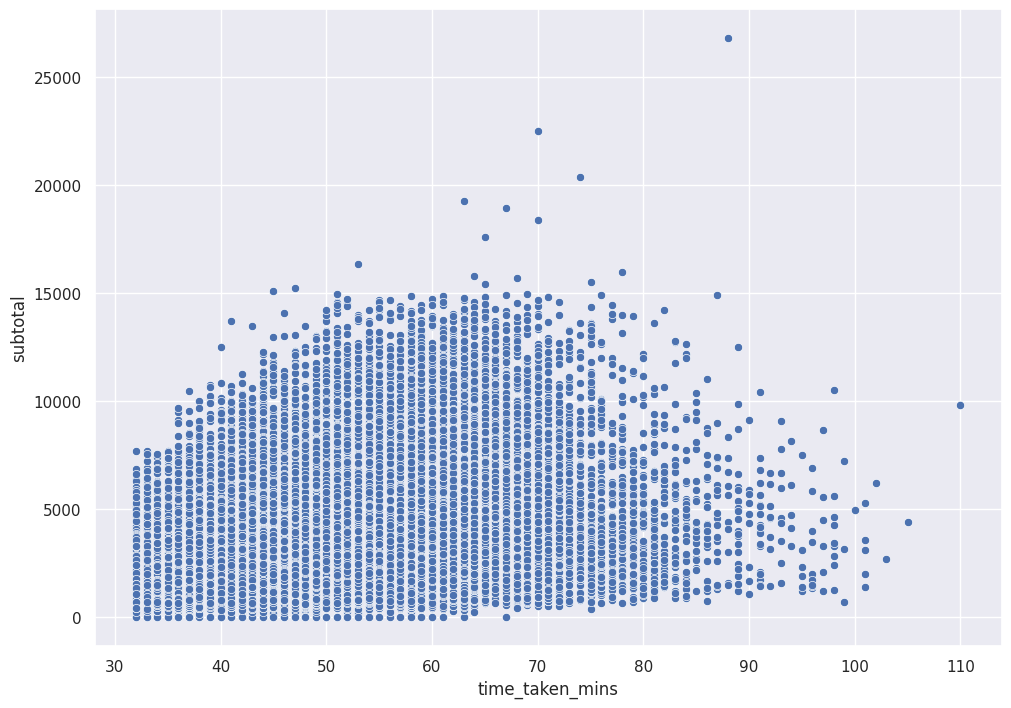

In [12]:
sns.scatterplot(x='time_taken_mins', y = 'subtotal', data = df)

In [13]:
from sklearn.neighbors import LocalOutlierFactor
model1 = LocalOutlierFactor()

df['lof_anomaly_score'] = model1.fit_predict(df)

In [14]:
print('number of outliers : ', (len(df.loc[(df['lof_anomaly_score'] == -1)])))
df = df.loc[(df['lof_anomaly_score'] == 1)]

number of outliers :  831


In [15]:
df.drop(['lof_anomaly_score'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174946 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     174946 non-null  float64
 1   store_primary_category                        174946 non-null  int64  
 2   order_protocol                                174946 non-null  float64
 3   total_items                                   174946 non-null  int64  
 4   subtotal                                      174946 non-null  int64  
 5   num_distinct_items                            174946 non-null  int64  
 6   min_item_price                                174946 non-null  int64  
 7   max_item_price                                174946 non-null  int64  
 8   total_onshift_dashers                         174946 non-null  float64
 9   total_busy_dashers                            174946 

<ipython-input-15-5af2d721a829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['lof_anomaly_score'], axis=1, inplace=True)


<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

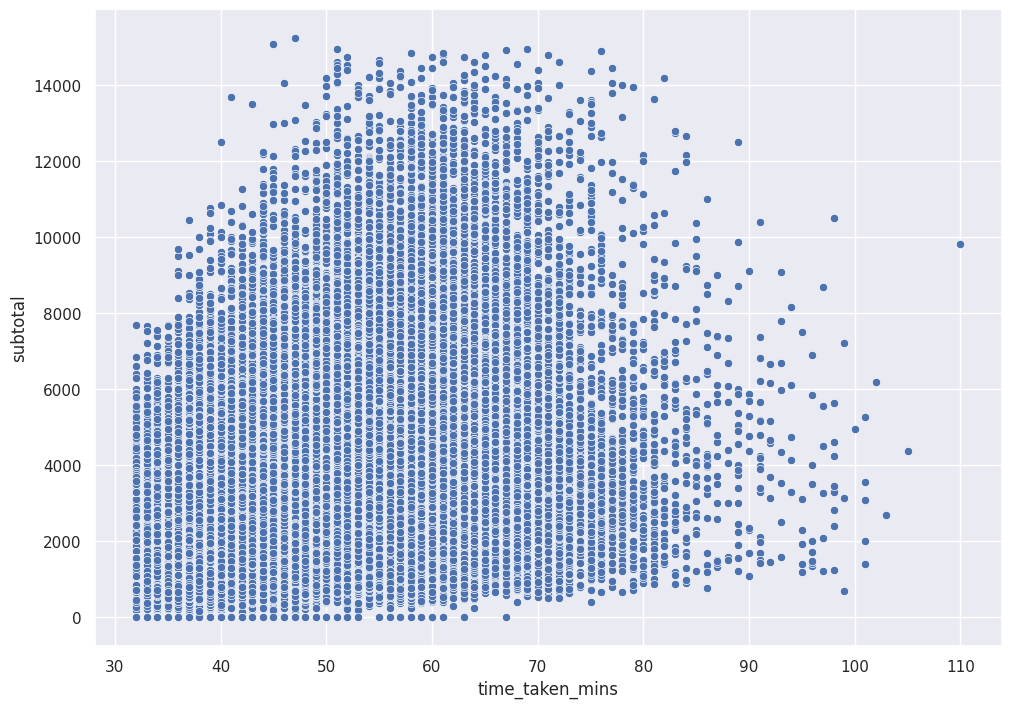

In [16]:
sns.scatterplot(x='time_taken_mins', y = 'subtotal', data = df)

<Axes: xlabel='day', ylabel='count'>

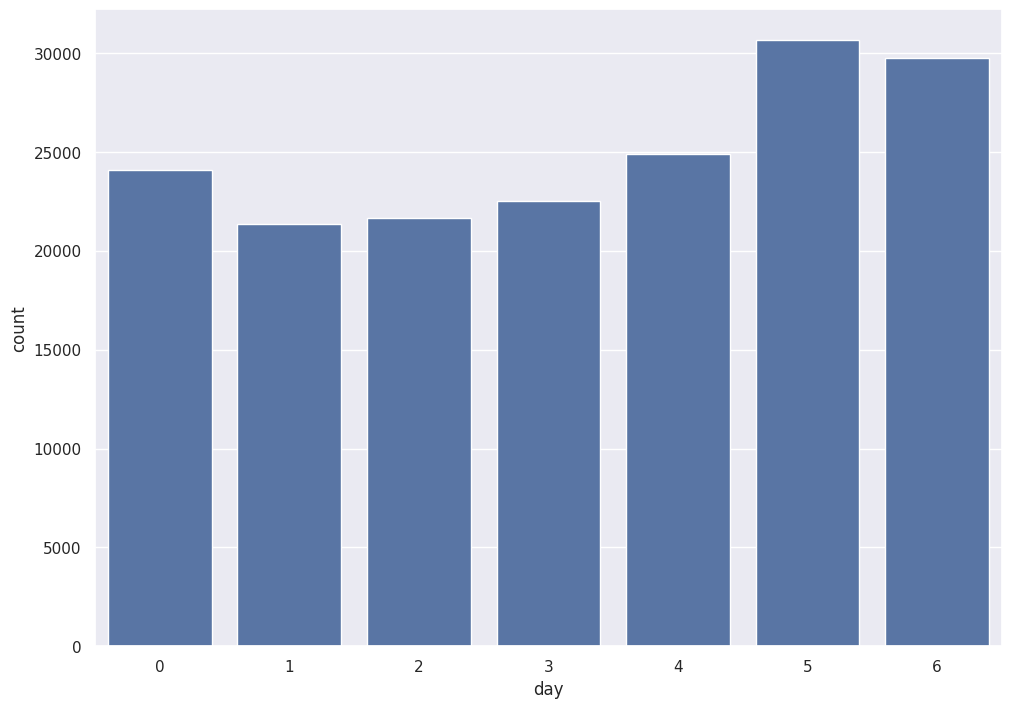

In [17]:
sns.countplot(x='day', data=df)

<Axes: xlabel='hour', ylabel='count'>

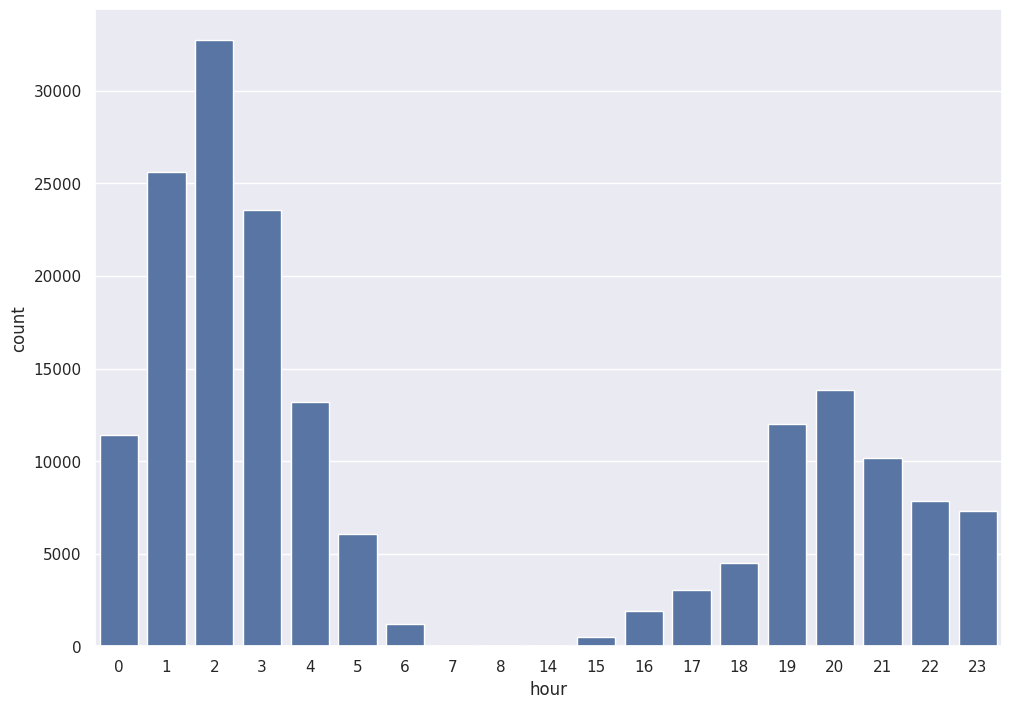

In [18]:
sns.countplot(x='hour', data=df)

<Axes: xlabel='hour', ylabel='time_taken_mins'>

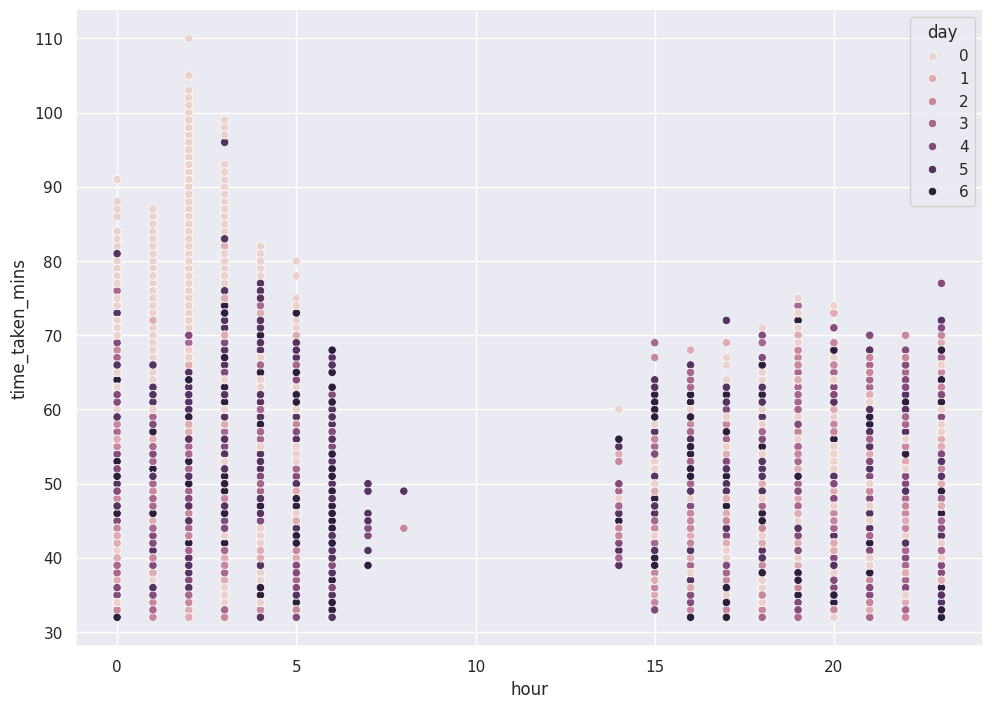

In [19]:
sns.scatterplot(x='hour', y='time_taken_mins', hue='day', data=df)

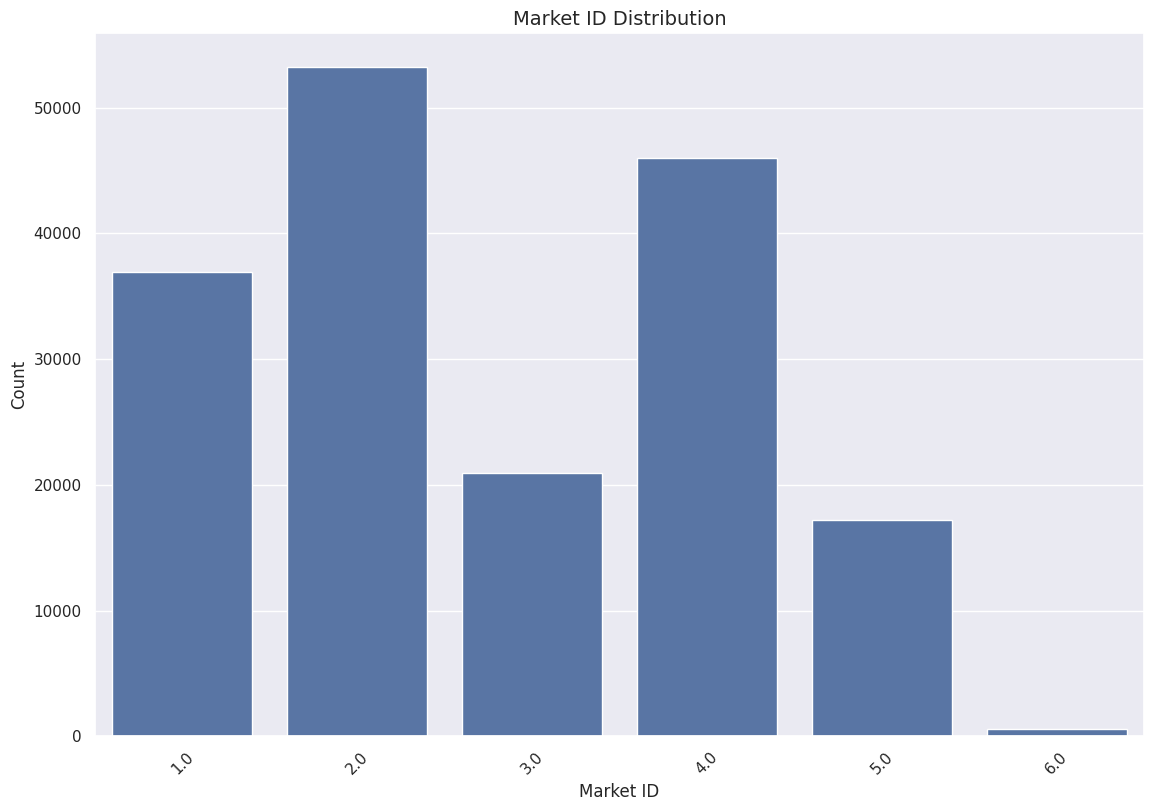

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot for market_id
sns.countplot(x='market_id', data=df)

# Customize the plot with labels and a title
plt.title('Market ID Distribution', fontsize=14)
plt.xlabel('Market ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()

<ipython-input-21-c68580eb8c9f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='store_primary_category', data=df, palette='viridis')


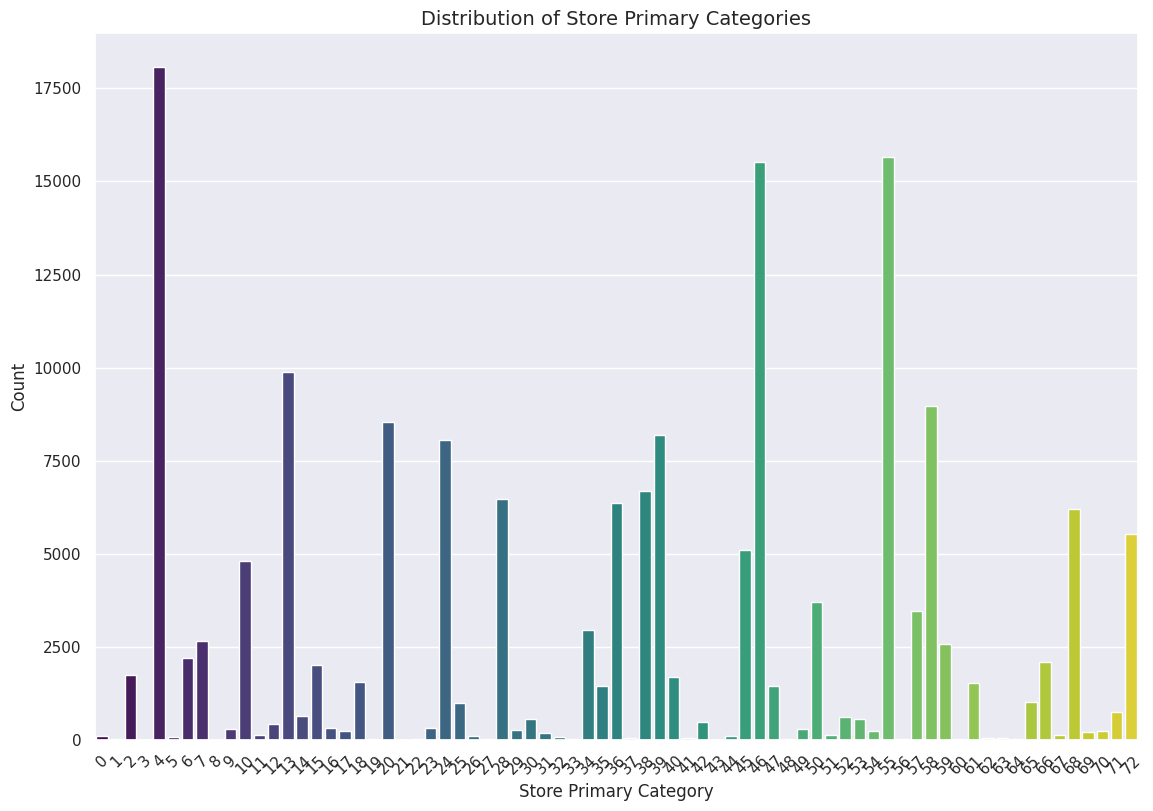

In [21]:
sns.countplot(x='store_primary_category', data=df, palette='viridis')

# Customize the plot with labels and a title
plt.title('Distribution of Store Primary Categories', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


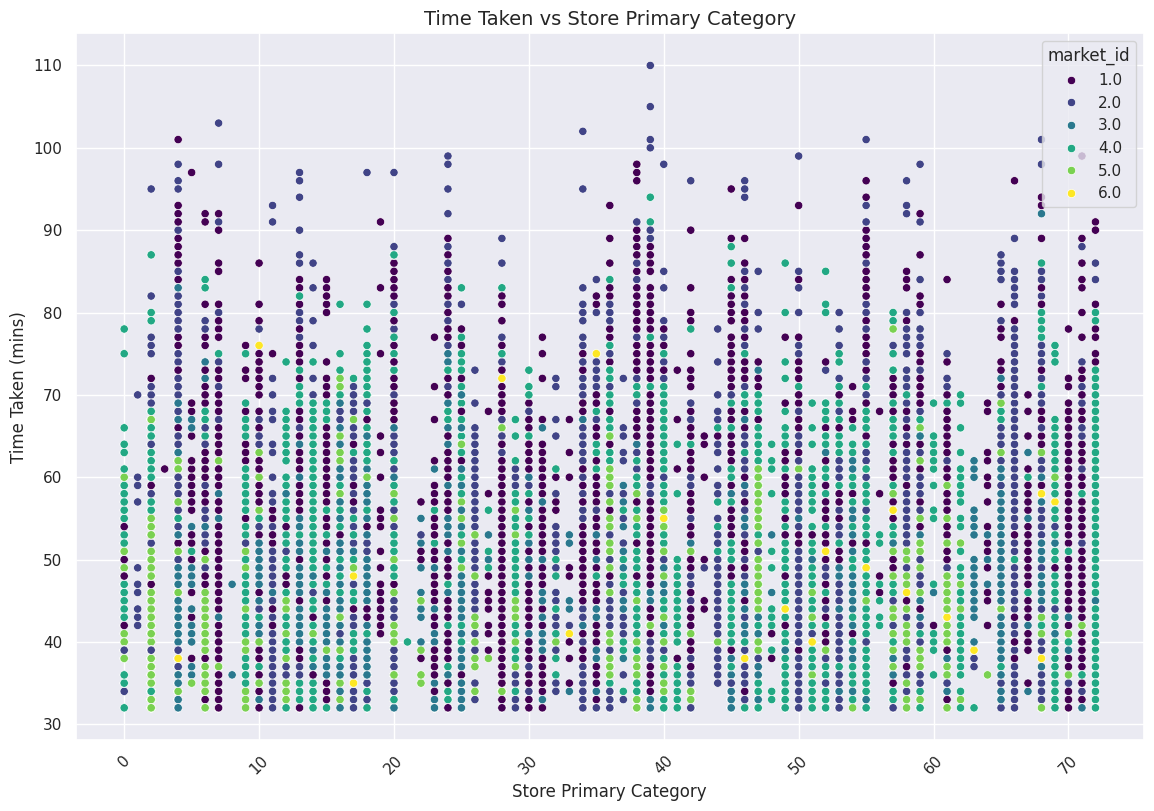

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='store_primary_category', y='time_taken_mins', data=df, hue='market_id', palette='viridis')

# Customize the plot
plt.title('Time Taken vs Store Primary Category', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Time Taken (mins)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

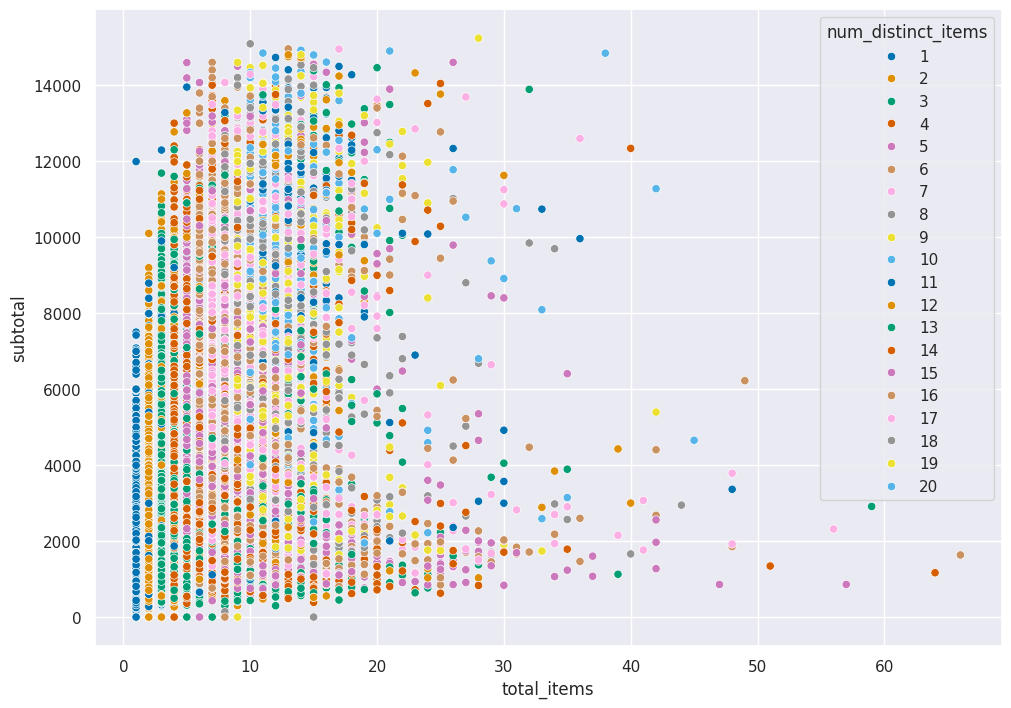

In [23]:
sns.scatterplot(x='total_items', y='subtotal', data=df, hue='num_distinct_items', palette='colorblind')
plt.show()

<Axes: xlabel='num_distinct_items', ylabel='time_taken_mins'>

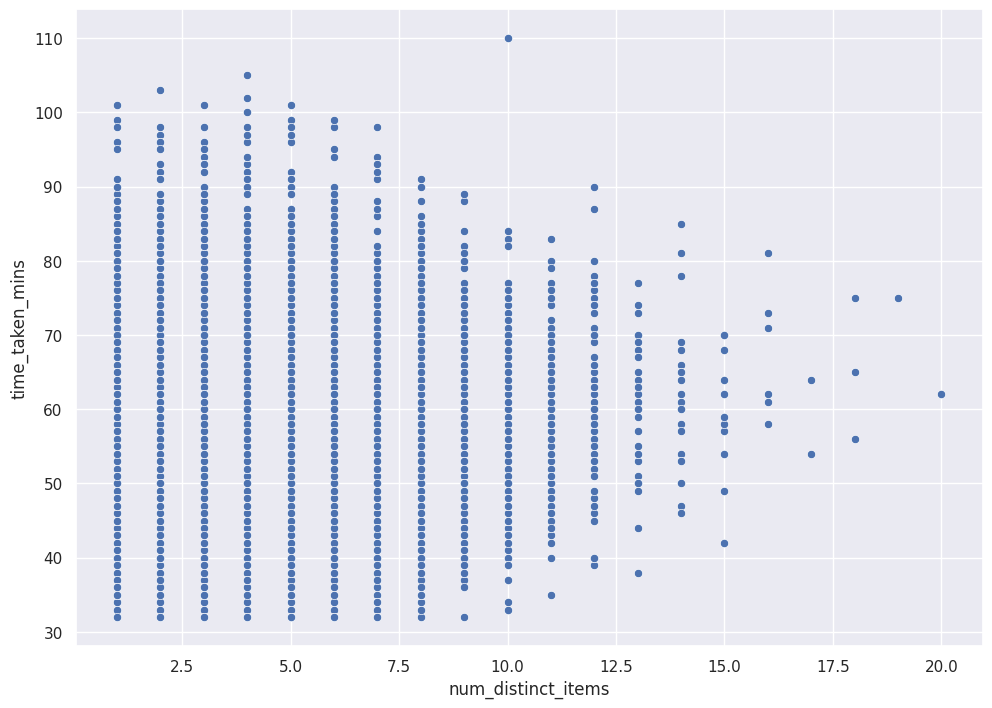

In [24]:
sns.scatterplot(x='num_distinct_items', y='time_taken_mins', data=df)

In [25]:
y = df['time_taken_mins']
x = df.drop(['time_taken_mins'], axis=1)
df.drop(['time_taken_mins'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**0.5
print('MSE : ', mse)
print('RMSE : ', rmse)
r2 = r2_score(y_test, prediction)
print('R2 : ', r2)
mae = mean_absolute_error(y_test, prediction)
print('mae :' ,mae)

MSE :  3.2211005630180054
RMSE :  1.7947424781895607
R2 :  0.9625629273983154
mae : 1.2856870534438414


Text(0.5, 0, 'Random Forest Feature Importance')

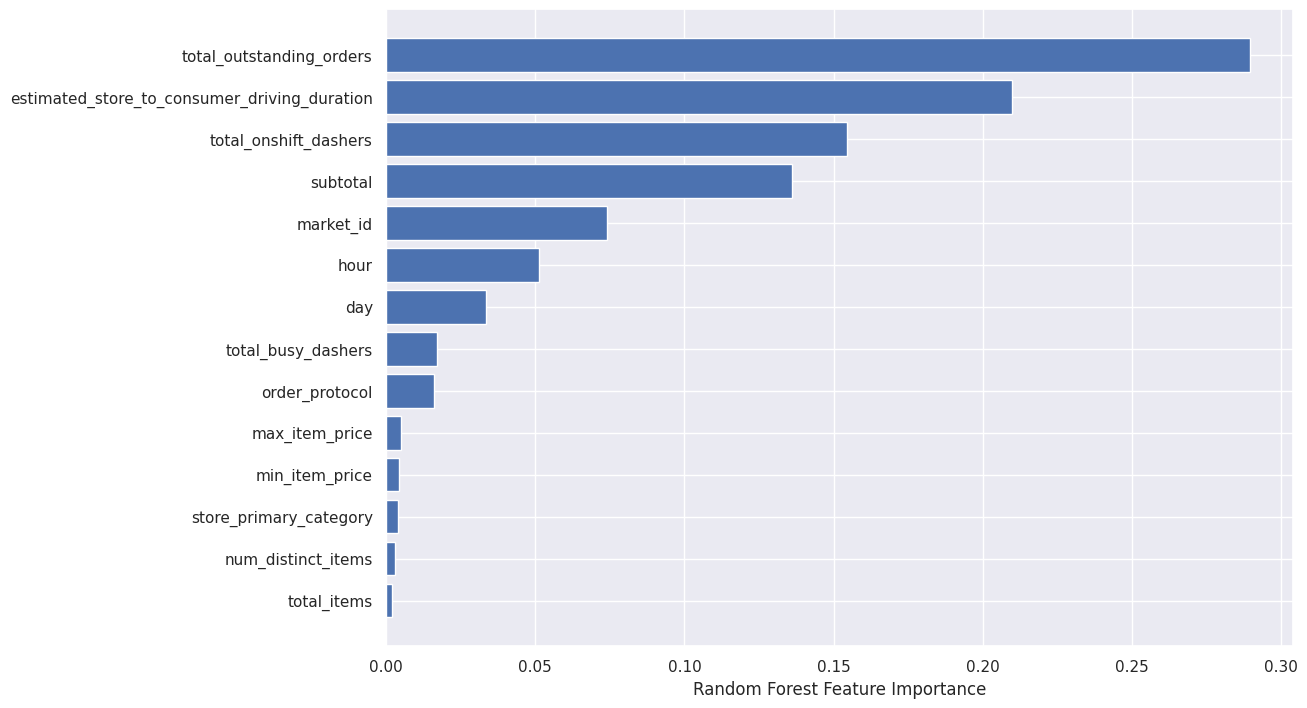

In [28]:
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [29]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [31]:
model = Sequential()
model.add(Dense(14, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='linear'))

from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 846.0218 - mae: 20.2307 - mse: 846.0218 - val_loss: 47.7672 - val_mae: 5.3550 - val_mse: 47.7672
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.6458 - mae: 3.5333 - mse: 23.6458 - val_loss: 6.3534 - val_mae: 1.8426 - val_mse: 6.3534
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5110 - mae: 1.7297 - mse: 5.5110 - val_loss: 4.4173 - val_mae: 1.5804 - val_mse: 4.4173
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4042 - mae: 1.3048 - mse: 3.4042 - val_loss: 2.2680 - val_mae: 1.0517 - val_mse: 2.2680
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8107 - mae: 1.2235 - mse: 2.8107 - val_loss: 1.9906 - val_mae: 0.9852 - val_mse: 1.9906
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3899 - mae: 1.1169 - mse: 2.3899 - val_loss: 1.9963 - val_mae: 1.0204 - val_mse: 1.9963
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2173 - mae: 1.0753 - mse: 2.

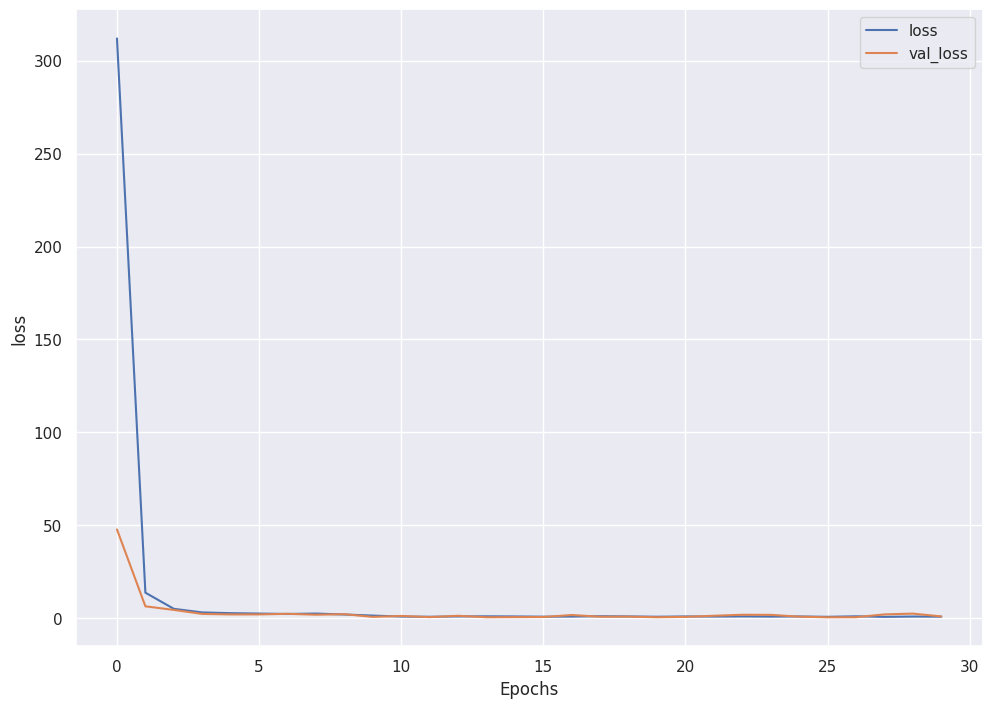

In [32]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
plot_history(history, 'loss')

In [33]:
z=model.predict(X_test)
mse = mean_squared_error(y_test, z)
rmse = mse**0.5
print('MSE : ', mse)
print('RMSE : ', rmse)
print('errors for neural net')
r2 = r2_score(y_test, z)
print('R2 : ', r2)

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
MSE :  0.9402732491344429
RMSE :  0.9696768787253014
errors for neural net
R2 :  0.9890717234049078
